The Mathieue equation of motion for an oscilalator with a driving force is, 
$$
\ddot{x} + \frac{e}{mr_0^2}\left(\alpha U+\alpha' V\cos(\omega_{RF} t)  \right)x=F(t)/m  + qE_{dc}/m
$$
where we define 
$$F(t)=f\cos(\gamma t +\beta)$$
The energy of the system is thus
$$E=\frac{1}{2}m(\dot{x}^2+\omega^2 x^2)$$
We can write our second order DE as two first orders
$$
\dot{x} = y
$$
$$
\dot{y}=F(t)/m +qE_{dc}/m - \frac{e}{m r_0^2}(U+V\cos(\omega_{RF}))x
$$

For an initial amplitude we assume $\bar{n} = 100$ thus 

$$E_i = \hbar\omega(n+\frac{1}{2})$$
$$x_i = \sqrt{\frac{2E_i}{m \omega^2}} = \sqrt{\frac{2 \hbar\omega(n+\frac{1}{2})}{m \omega^2}}$$

Next we suppose our forcing electric field is uniform, then we can assume some noise voltage $V$ is placed on the trap rods, the force is then
$$
F=qE=\frac{qV}{r_0}\cos(\omega_{noise})
$$

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
from scipy.fft import fft, fftfreq
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

def Euler(x,y,t,u_c,v_c,f,w,g,e_dc,m,q):
    for i in range(len(t))[1:]:
        y[i] = y[i-1]+del_t*(f*np.cos(g*t[i-1])/m-(u_c+v_c*np.cos(w*t[i-1]))*x[i-1]+e_dc*q/m)
        x[i] = x[i-1]+del_t*y[i-1]
    return(x)

#have to operate in units of 10e-4 seconds in order to integrate 
hbar = 1.0545e-34
e=1.60217662e-19
m=2.20852e-25
w=2.587e6*np.pi*2 #trap freq
d=3e-3 #trap radius
vr=400 #trap voltage
ur=0 #static field
e_dc=0 #stray field

initial ion motion amplitude 7.683914149568852e-08 m
initial forcing amplitude 0.0 N


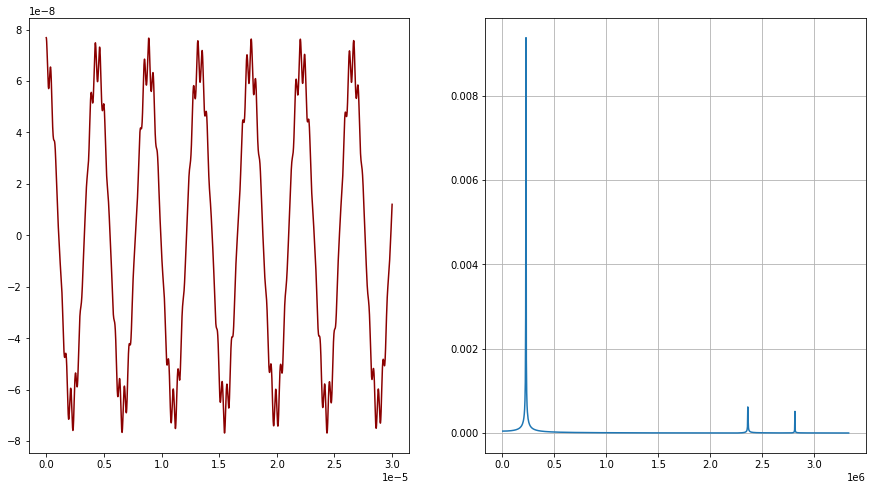

0.23038244247436523


In [10]:
#Initial Conditions 
g=216e3*2*np.pi #forcing/noise frequency
p=0e-12  #noise power
v=np.sqrt(p*50)  #noise voltage
n=100
f = e*(v/d)
v_c=e/(m*d**2)*vr
u_c=e/(m*d**2)*ur

del_t = 1e-9
t = np.arange(0,3e-4,del_t)

xi = [0 for i in range(len(t))]; yi = [0 for i in range(len(t))]
xi[0]=np.sqrt(2*hbar*w*(n+.5)/(m*w**2))
print('initial ion motion amplitude '+ str(xi[0]) +' m')
print('initial forcing amplitude '+ str(f) +' N')
y=Euler(xi,yi,t,u_c,v_c,f,w,g,e_dc,m,e)


N=len(t)
yf = fft(y)
xf = fftfreq(N, del_t)



##Plotting Results###
import time
t0=time.time()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
#fig.suptitle('Numerical Result', fontsize=20)
#ax = fig.gca()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.plot(t[0:int(len(t)/10)],y[0:int(len(t)/10)], color = 'darkred')
# ax1.plot(t,y, color = 'darkred')
ax2.plot(xf[1:1000],np.abs(yf[1:1000]))
plt.grid()
plt.show()
t1=time.time()
print(t1-t0)

In [3]:
# peak search
peaks = []
amp = [] 
temp=0
temp2 = 0
for i in range(1,len(yf[:N//2])):
    if np.abs(yf[i]) > 1e-5:
        if np.abs(yf[i]) > np.abs(yf[i-1]) and np.abs(yf[i]) > np.abs(yf[i+1]):
            peaks.append(xf[i])
            amp.append(np.abs(yf[i]))

for i in peaks:
    print(i/1e3)
    
print(amp)

213.33333333333331
226.66666666666666
2360.0
2373.333333333333
2803.333333333333
2813.333333333333
[0.0008414790133969131, 0.008067386216064381, 0.0005368148079124382, 9.11987514041087e-05, 5.935795978505614e-05, 0.0004416575921612185]


In [4]:
##new trap
import scipy.constants as sc
import numpy as np
r0= 200e-6
m = 2.29154e-25
w = 2*np.pi*35e6
V = 150

(2*sc.e*V)/(m*r0**2*w**2)

0.10842973321811428

In [5]:
##Axial Secular freq
import scipy.constants as sc
import numpy as np


wz = 509*2*np.pi*1e3
atk = 1.66054e-27
m = 138*atk

V = (wz/2)**2*(m)

iso = list(range(130,138))

for i in iso:
    print(i,2*np.sqrt(V/(i*atk))/(2*np.pi*1e3))
    

print('titanium'  , 2*np.sqrt(V/(48*atk))/(2*np.pi*1e3))
print('strontium', 2*np.sqrt(V/(87*atk))/(2*np.pi*1e3))

130 524.4277320602394
131 522.4222649359074
132 520.4396305921649
133 518.4793990295517
134 516.5411515010492
135 514.6244801362986
136 512.728987581044
137 510.8542866510773
titanium 863.0514903526904
strontium 641.0585534610058


In [8]:
m = 2.29154e-25
import numpy as np
w = 2*np.pi*2.3e6
r0 = 75e-6
td = .5*r0**2*w**2*m
ev = 1.60218e-19
print(td/ev)

0.8400866362940295
